### Seattle AirBnB Data

#### `Business Questions (Business Understanding)`


* What is the most registered types of properties?


* What is the mean price, per day, by property?


* But what makes the property type price?


* How much a ‘good price’ can affect the review?



#### `Data Understanding`

**The file used as a database returns listings of properties on the airbnb platform, recording different information on different dates and seasons of the year. The focus of this analysis will be from the records of the review, amenities and price columns. Finally, identify what effect they have on each other.**


Using business questions to data understanding:

`1.` What is the most registered types of properties in Seattle?

**To answer this question, we need the available column of the 'property type'. I treated Nan's droping them when all of values was NaN for both axis and get the porportion of each property type**

`2.` What is the mean price, per day, by property?

**To this question will necessary use two availabel columns in listings dataframe, 'property type' and 'price'**


`3.` But what makes the property type price?

**This question will again use the price column. But, for this time I used the amenities column to answer this question** 

`4.` How much a ‘good price’ can affect the review?

**To this question I used the price column and the review scores rating to compare both.**


#### `Data Preparation & Results`

None of the questions really involve machine learning or predictive models of any kind. I split the data used in parts: preparation, plotting a visualization and analysis.

##### Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Gather Data

In [37]:

# Option to see all table columns
pd.set_option('display.max_columns', 500)

# Seattle Data
df = pd.read_csv("./listings.csv")

### Before start the resolution of the first question lets prepare the data

`From *"listings.csv"* archive, I'm verifying the columns and defining only that will be usefull in my analysis.`

## Assess

In [38]:
# see the size of the archive
df.shape

(3818, 92)

In [39]:
# Verifying the existent columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Clean Data

In [40]:
# Definig the columns that I will be use.
cols = ['id', 'property_type', 'room_type', 'accommodates', \
        'amenities', 'square_feet', 'price', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', \
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', \
       'review_scores_location', 'review_scores_value']

# Here I'm replacing the old 'df' into a new with the same name
# this new dataframe contains only the columns that I set in the list, called 'cols', above.
df = df[cols]

`Here I'm verifying how much of the data is null in each column, to set my expectations about what this data will be useful for`

In [41]:
df.isnull().sum()

id                                0
property_type                     1
room_type                         0
accommodates                      0
amenities                         0
square_feet                    3721
price                             0
number_of_reviews                 0
reviews_per_month               627
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_communication     651
review_scores_location          655
review_scores_value             656
dtype: int64

`The code below have the function to drop the column or row that have all values null`

* The focus here is to keep the data clean and ultimately provide us with a reliable analysis of the data

In [42]:
# column
df = df.dropna(how='all', axis=1)
# row
df = df.dropna(how='all', axis=0)

*Starting to answer the questions*

## **`1.` What is the most registered types of properties in Seattle?**

## Analyse

`Here I'm verifying the count of each type of property in "property_type" column`


In [43]:
df.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

## Visualise

`I use the plot below to see the proportion of different types of porperties`


In [44]:
# Function creation
def barplot(df, col):

    '''
        Returns a bar plot of the column of the dataframe requested in the definition of the function

        input:
                Dataframe: Dataframe of the data
                Col: Col that exists in the above dataframe
        output:

    
    '''

    (df[col].value_counts() / df[col].value_counts().sum() * 100).plot(kind='bar', figsize=(10,6))

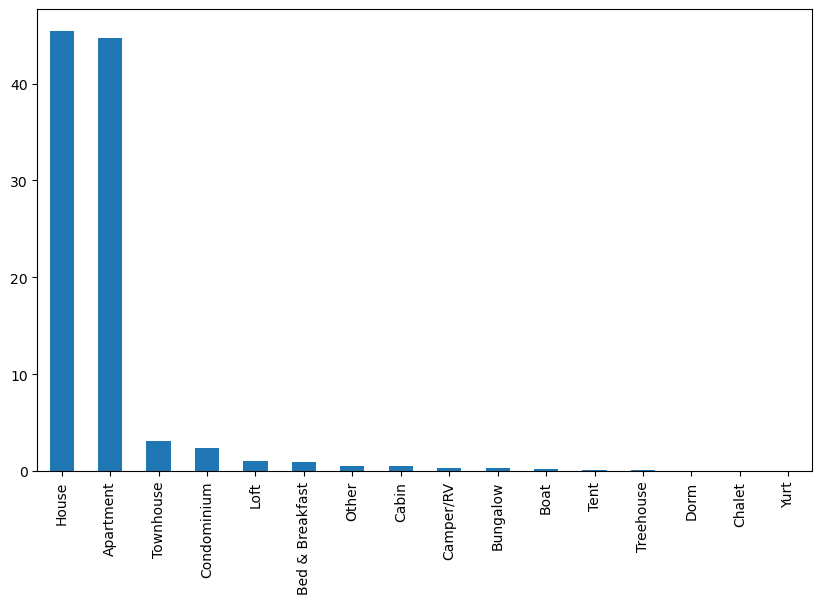

In [45]:
# Example
barplot(df, 'property_type')


**In the plot below, for Seattle we can see that most Homes are available for rent. Almost  1,740 of the registers of porperty type is House. 
Which, in proportion, represents more than 40% of the data.**

In [46]:
# The code below shows the exact same thing in the plot above, but this time in number
df['property_type'].value_counts() / df['property_type'].value_counts().sum() * 100

House              45.402148
Apartment          44.747184
Townhouse           3.091433
Condominium         2.384071
Loft                1.047943
Bed & Breakfast     0.969348
Other               0.576369
Cabin               0.550170
Camper/RV           0.340582
Bungalow            0.340582
Boat                0.209589
Tent                0.130993
Treehouse           0.078596
Dorm                0.052397
Chalet              0.052397
Yurt                0.026199
Name: property_type, dtype: float64

##  **`2.` What is the mean price, per day, by property?**

## Clean and Analyse

**For this question, we will need to treat the price column**

`In the code below I'm replacing the dollar sign and commas to a blank space, to then change the type of the column`

In [47]:
# Treat dollar sign to blank space
df['price'] = df['price'].str.replace('$', '')

# Treat commar to blank space
df['price'] = df['price'].str.replace(',', '')

# Changing the data type of the column
df['price'] = df['price'].astype('float')

C:\Users\LGuirald\AppData\Local\Temp\ipykernel_16924\387792833.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


## Visualise

`The plot below shows the mean price grouped by porperty in Seattle`

<AxesSubplot:ylabel='property_type'>

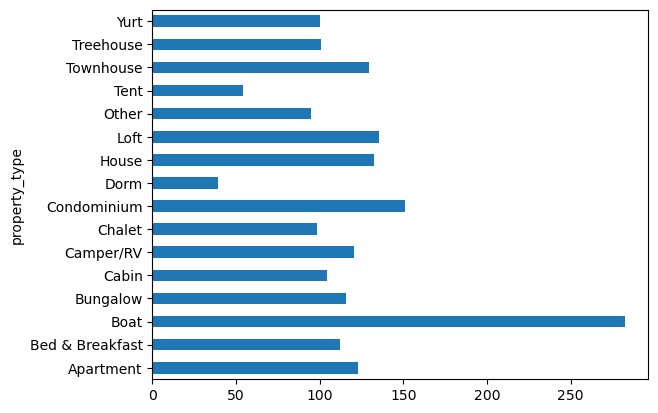

In [48]:
df.groupby('property_type')['price'].mean().plot.barh()

**Doing an analysis we can see the property type 'Boat', have the mean price more expensive after all**

## **`3.` But what makes the property type price?**

## Clean and Analyse

`Here I start a little investigation to find if the amenities are the main field to define the price`

The amenities field comes with cells filled with the list of amenities offered by the property, always separated by commas. As a simple way to define metrics from this information, I created a new column that returns the count of amenities offered by each property

In [49]:
# count of amentities per property
df['Total_amenities'] = df['amenities'].str.count(',')

## Visualise

`The plot below shows the count of amenities compared by price, to find if has some relation`

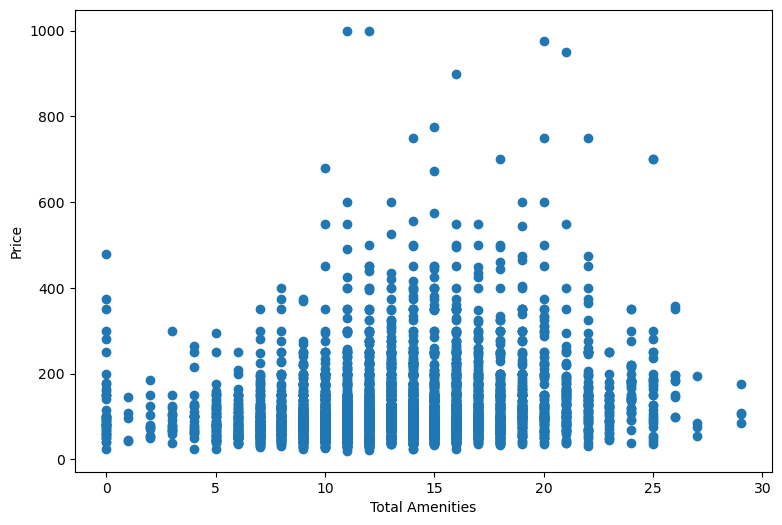

In [50]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df['Total_amenities'], df['price'])
ax.set_xlabel('Total Amenities')
ax.set_ylabel('Price')
plt.show()

**With the analysis of this plot we can see that amenities is not exactly the main way to define price. Even if the porperty has 30 or 5 amenities, the price maintains its self in the average.**

## **`4.` How much a ‘good price’ can affect the review?**

## Analyse and visualise

`The plot below is used to find if has some relation between a good review and the price of rent`

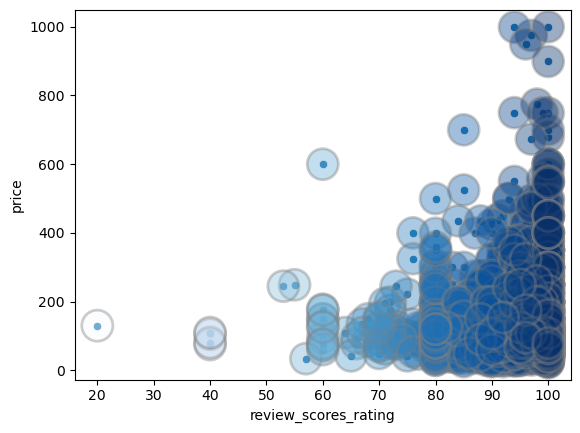

In [51]:
sns.scatterplot(data=df, x='review_scores_rating', y='price', legend=False, sizes=(20, 2000))
plt.scatter(df['review_scores_rating'], df['price'], s=500 , c=df['review_scores_rating'], cmap='Blues', alpha=0.4, edgecolors='grey', linewidth=2)

**Analyzing the graph, we can see that the real estate price of the people who gave the highest reviews actually remains on average. Which shows us that a 'good price' is not a main indicator to receive a good review**